In [2]:
%matplotlib inline

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator import plot_resonator
from kid_readout.analysis.timeseries import iqnoise
from kid_readout.equipment import hpd_temps

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-25_141727_sweep_stream_on_off/')

In [20]:
npd.node_names()

['SingleSweepStream0',
 'SingleSweep1',
 'SingleStream2',
 'ADCSnap3',
 'SingleSweepStream4',
 'SingleSweep5',
 'SingleStream6',
 'ADCSnap7',
 'SingleSweepStream8',
 'SingleSweep9',
 'SingleStream10',
 'ADCSnap11',
 'SingleSweepStream12',
 'SingleSweep13',
 'SingleStream14',
 'ADCSnap15',
 'SingleSweepStream16',
 'SingleSweep17',
 'SingleStream18',
 'ADCSnap19',
 'SingleSweepStream20',
 'SingleSweep21',
 'SingleStream22',
 'ADCSnap23',
 'SingleSweepStream24',
 'SingleSweep25',
 'SingleStream26',
 'ADCSnap27',
 'SingleSweepStream28',
 'SingleSweep29',
 'SingleStream30',
 'ADCSnap31',
 'SingleSweepStream32',
 'SingleSweep33',
 'SingleStream34',
 'ADCSnap35',
 'SingleSweepStream36',
 'SingleSweep37',
 'SingleStream38',
 'ADCSnap39',
 'SingleSweepStream40',
 'SingleSweep41',
 'SingleStream42',
 'ADCSnap43',
 'SingleSweepStream44',
 'SingleSweep45',
 'SingleStream46',
 'ADCSnap47',
 'SingleSweepStream48',
 'SingleSweep49',
 'SingleStream50',
 'ADCSnap51',
 'SingleSweepStream52',
 'SingleSwe

In [35]:
on_sss = npd.read('SingleSweepStream96')
off_ss = npd.read('SingleStream98')

In [36]:
on_sss.stream.frequency_MHz

3523.1648437500003

In [37]:
on_sss.stream.roach_state.dac_attenuation

20.0

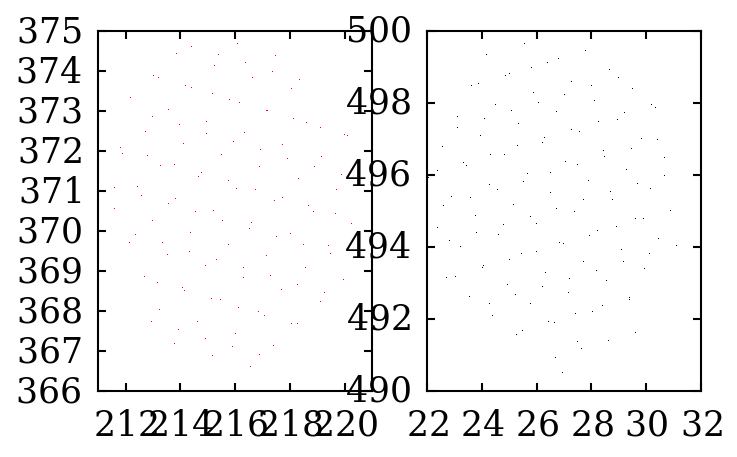

In [38]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(on_sss.stream.s21_raw.real, on_sss.stream.s21_raw.imag, ',r')
axes[1].plot(off_ss.s21_raw.real, off_ss.s21_raw.imag, ',k')

In [39]:
def plot_s21_on_off(on_ss, off_ss):
    fig, axes = plt.subplots(4, 1, figsize=(2, 4))
    axes[0].plot(on_ss.sample_time, on_ss.s21_raw.real, '-', color='red')
    axes[1].plot(on_ss.sample_time, on_ss.s21_raw.imag, '-', color='orange')
    axes[2].plot(off_ss.sample_time, off_ss.s21_raw.real, '-', color='blue')
    axes[3].plot(off_ss.sample_time, off_ss.s21_raw.imag, '-', color='green')
    return fig, axes

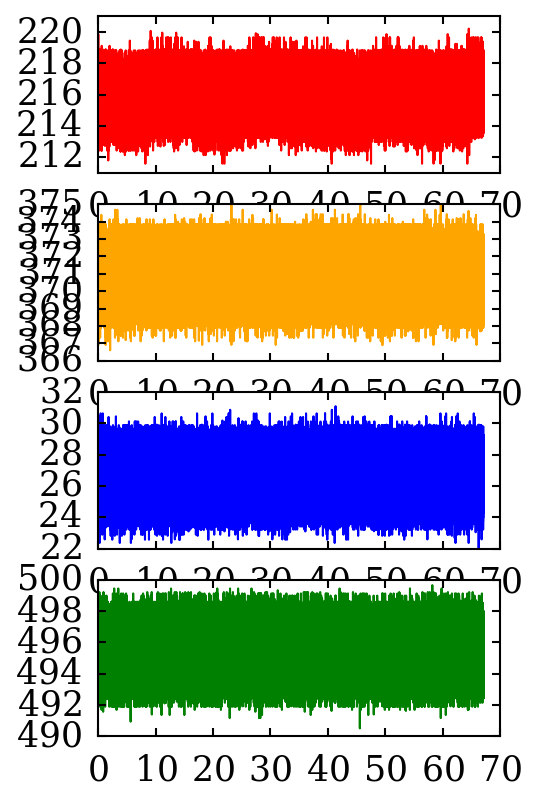

In [40]:
plot_s21_on_off(on_sss.stream, off_ss);

In [41]:
temps = hpd_temps.get_temperatures_at(off_ss.epoch + off_ss.sample_time)

In [42]:
package = temps[0]
package.mean()

0.37907345501046352

In [43]:
package_fluctuation_uK = 1e6 * (package - 0.379)

In [44]:
on_sss.set_stream_s21_normalized_deglitched()
#on_sss.set_stream_s21_normalized_deglitched(window_in_seconds=1, deglitch_threshold=2.0)
on_sss.set_q_and_x(deglitch=True)

(0, 150)

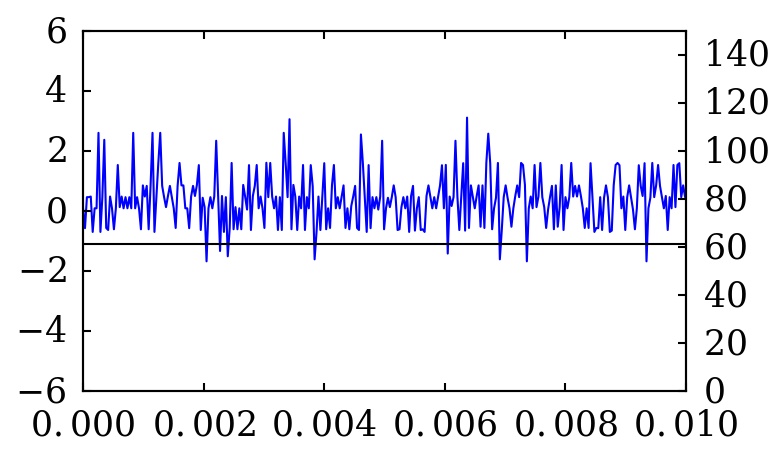

In [50]:
fig, x_ax = plt.subplots()
T_ax = x_ax.twinx()
x_ax.plot(on_sss.stream.sample_time, 1e6 * on_sss.x, color='blue')
T_ax.plot(on_sss.stream.sample_time, package_fluctuation_uK, color='black')

x_ax.set_xlim(0, 0.01)
T_ax.set_ylim(0, 150)
#x_ax.set_ylim(-2e-6, 2e-6);

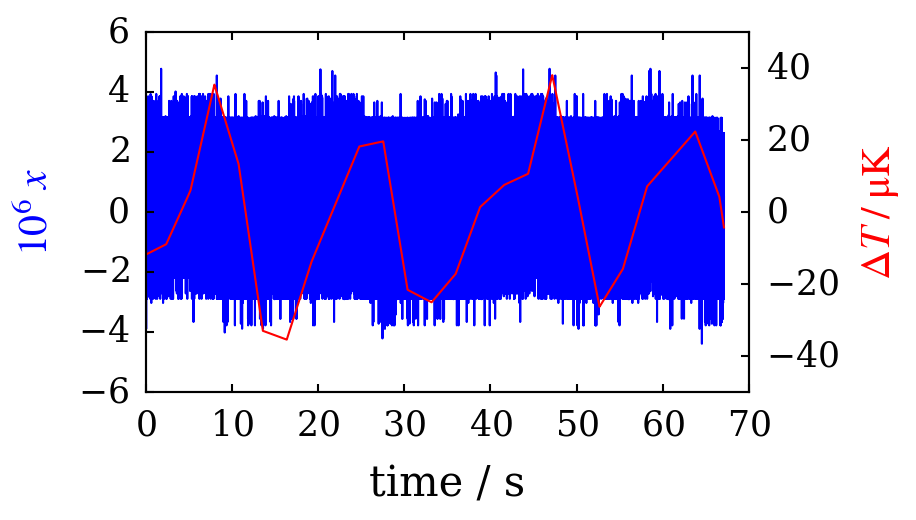

In [46]:
x_color = 'blue'
T_color = 'red'

fig, x_ax = plt.subplots()
T_ax = x_ax.twinx()
x_ax.set_xlabel('time / s')
x_ax.set_ylabel('$10^6 \; x$', color=x_color)
T_ax.set_ylabel('$\Delta T \; / \; \mathrm{\mu K}$', color=T_color)
x_ax.plot(on_sss.stream.sample_time, 1e6 * on_sss.x, color=x_color)
T_ax.plot(on_sss.stream.sample_time, 1e6 * (package - package.mean()), color=T_color)
T_ax.set_ylim(-50, 50)

fig.savefig('/home/flanigan/temp/x_and_T_vs_time_380_mK.png')

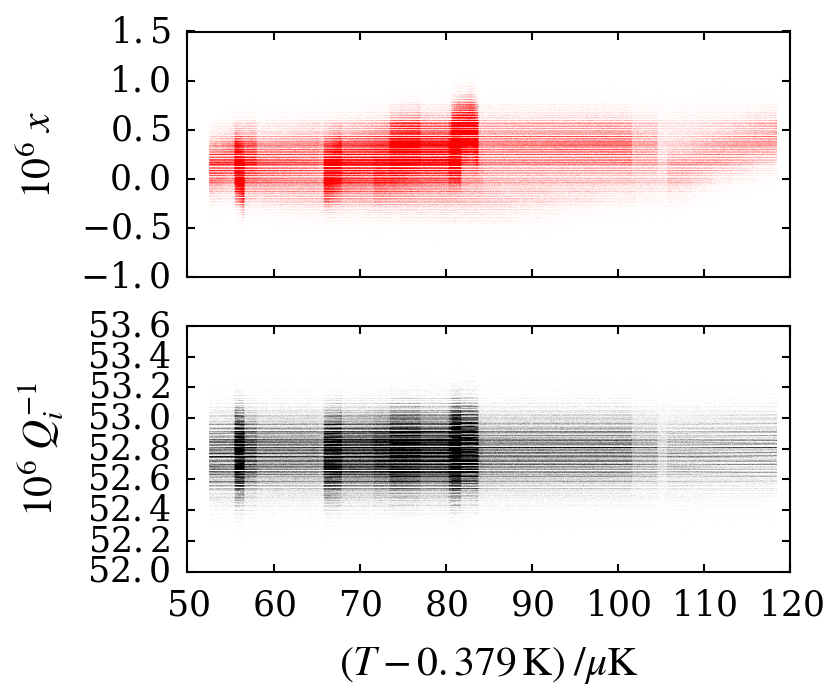

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(3, 3), sharex=True)
axes[0].set_ylabel('$10^6 \; x$')
axes[1].set_ylabel('$10^6 \; Q_i^{-1}$')
axes[1].set_xlabel('$(T - 0.379 \, \mathrm{K}) \; / \mu \mathrm{K}$')

axes[0].plot(package_fluctuation_uK, 1e6 * on_sss.x, ',r', alpha=0.01)
axes[1].plot(package_fluctuation_uK, 1e6 * on_sss.y, ',k', alpha=0.01)
#axes[0].set_ylim(-0.5, 1)
#axes[1].set_ylim(52.3, 53.3);